# Deep Learning: A Comprehensive Guide

This notebook provides a complete guide to deep learning fundamentals, implementation, and AWS services.

In [8]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## Sigmoid Model Analysis

Analysis of the sigmoid neural network model from Model_sigmoid.ipynb:

### Architecture:
- **Input Layer**: 2 neurons (receives input [0, 1])
- **Hidden Layer**: 3 neurons with sigmoid activation
- **Output Layer**: 1 neuron with sigmoid activation
- **Total Parameters**: (2×3) + (3×1) = 9 weights

### Sigmoid Function Properties:
- **Formula**: σ(x) = 1/(1 + e⁻ˣ)
- **Range**: (0, 1) - perfect for binary classification
- **Derivative**: σ'(x) = σ(x)(1 - σ(x))
- **Maximum Derivative**: 0.25 at x = 0

![Sigmoid Model Analysis](images/sigmoid_model_analysis.png)

### Training Process:
1. **Forward Propagation**: Input [0,1] → Hidden layer → Output
2. **Error Calculation**: target - output
3. **Backpropagation**: Compute gradients using chain rule
4. **Weight Updates**: W = W + α × gradient

### Performance Results:
- **Training Task**: Learn to output 1 when input is [0, 1]
- **Final Output**: ~0.721 (good approximation of target 1)
- **Convergence**: Rapid learning in first 200 epochs
- **Error Reduction**: MSE decreases exponentially

### Why Sigmoid Works:
1. **Binary Nature**: Output needs to be between 0 and 1
2. **Smooth Gradients**: Allows stable learning
3. **Non-linearity**: Enables complex pattern learning
4. **Probabilistic**: Output interpretable as probability

### Limitations:
1. **Vanishing Gradients**: Deep networks suffer from small gradients
2. **Saturation**: Extreme inputs lead to near-zero gradients
3. **Not Zero-Centered**: Can cause zigzag learning patterns
4. **Computational Cost**: Exponential function is expensive

## Complete Neural Network Implementation

Let's implement a comprehensive neural network class that demonstrates all the concepts we've discussed.

In [9]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        """Initialize neural network with specified architecture."""
        # Xavier initialization for better convergence
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1.0 / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1.0 / hidden_size)
        self.b2 = np.zeros((1, output_size))
        
        self.activation = activation
        self.losses = []
        
    def sigmoid(self, x):
        """Sigmoid activation function with numerical stability."""
        x_clipped = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x_clipped))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid function."""
        return x * (1 - x)
    
    def relu(self, x):
        """ReLU activation function."""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Derivative of ReLU function."""
        return (x > 0).astype(float)
    
    def tanh(self, x):
        """Tanh activation function."""
        return np.tanh(x)
    
    def tanh_derivative(self, x):
        """Derivative of tanh function."""
        return 1 - x**2
    
    def forward(self, X):
        """Forward propagation through the network."""
        # Hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        
        if self.activation == 'sigmoid':
            self.a1 = self.sigmoid(self.z1)
        elif self.activation == 'relu':
            self.a1 = self.relu(self.z1)
        elif self.activation == 'tanh':
            self.a1 = self.tanh(self.z1)
        
        # Output layer (always sigmoid for binary classification)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def backward(self, X, y, output):
        """Backward propagation to compute gradients."""
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = output - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        # Hidden layer gradients
        da1 = np.dot(dz2, self.W2.T)
        
        if self.activation == 'sigmoid':
            dz1 = da1 * self.sigmoid_derivative(self.a1)
        elif self.activation == 'relu':
            dz1 = da1 * self.relu_derivative(self.z1)
        elif self.activation == 'tanh':
            dz1 = da1 * self.tanh_derivative(self.a1)
        
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        """Update network parameters using gradients."""
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def compute_loss(self, y_true, y_pred):
        """Compute binary cross-entropy loss."""
        epsilon = 1e-15  # Prevent log(0)
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def train(self, X, y, epochs, learning_rate=0.1, print_every=100):
        """Train the neural network."""
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y, output)
            self.losses.append(loss)
            
            # Backward propagation
            dW1, db1, dW2, db2 = self.backward(X, y, output)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)
            
            # Print progress
            if epoch % print_every == 0:
                print(f"Epoch {epoch:4d}, Loss: {loss:.6f}")
    
    def predict(self, X):
        """Make predictions on new data."""
        return self.forward(X)

print("Complete Neural Network class implemented!")

Complete Neural Network class implemented!


## Testing the Neural Network on XOR Problem

Let's test our comprehensive neural network on the classic XOR problem.

In [10]:
# XOR dataset
X_xor = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

y_xor = np.array([[0],
                  [1],
                  [1],
                  [0]])

# Create and train neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1, activation='sigmoid')
nn.train(X_xor, y_xor, epochs=2000, learning_rate=1.0, print_every=200)

# Test predictions
predictions = nn.predict(X_xor)
print("\nXOR Problem Results:")
print("Input\t\tTarget\tPrediction")
for i in range(len(X_xor)):
    print(f"{X_xor[i]}\t{y_xor[i][0]}\t{predictions[i][0]:.4f}")

Epoch    0, Loss: 0.707976
Epoch  200, Loss: 0.679290
Epoch  400, Loss: 0.434052
Epoch  600, Loss: 0.078005
Epoch  800, Loss: 0.030015
Epoch 1000, Loss: 0.017807
Epoch 1200, Loss: 0.012483
Epoch 1400, Loss: 0.009546
Epoch 1600, Loss: 0.007699
Epoch 1800, Loss: 0.006436

XOR Problem Results:
Input		Target	Prediction
[0 0]	0	0.0073
[0 1]	1	0.9950
[1 0]	1	0.9949
[1 1]	0	0.0046


## Visualization of Training Progress

Let's create visualizations to understand how the network learns.

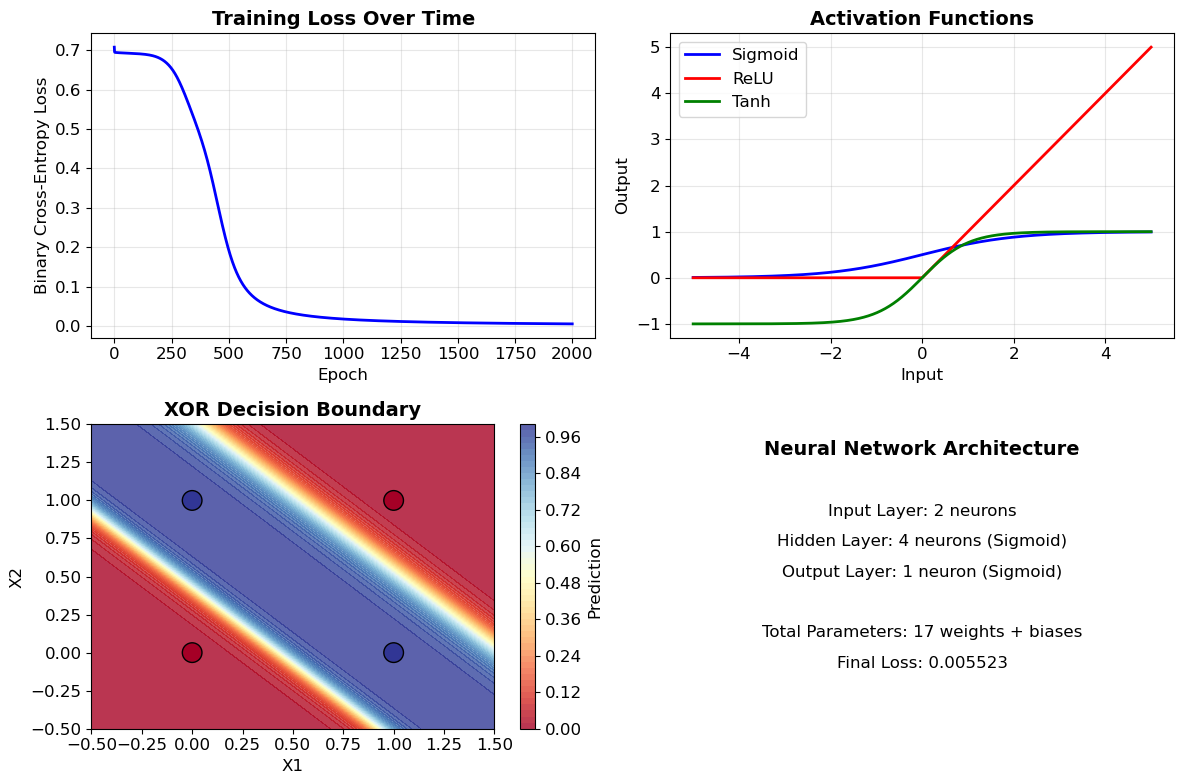

Complete neural network analysis visualization saved!


In [12]:
# Plot training loss
plt.figure(figsize=(12, 8))

# Loss curve
plt.subplot(2, 2, 1)
plt.plot(nn.losses, 'b-', linewidth=2)
plt.title('Training Loss Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.grid(True, alpha=0.3)

# Activation functions comparison
x = np.linspace(-5, 5, 1000)

plt.subplot(2, 2, 2)
sigmoid_vals = 1 / (1 + np.exp(-x))
relu_vals = np.maximum(0, x)
tanh_vals = np.tanh(x)

plt.plot(x, sigmoid_vals, 'b-', label='Sigmoid', linewidth=2)
plt.plot(x, relu_vals, 'r-', label='ReLU', linewidth=2)
plt.plot(x, tanh_vals, 'g-', label='Tanh', linewidth=2)
plt.title('Activation Functions', fontsize=14, fontweight='bold')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True, alpha=0.3)

# XOR decision boundary visualization
plt.subplot(2, 2, 3)
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = nn.predict(grid_points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=50, alpha=0.8, cmap='RdYlBu')
plt.colorbar(label='Prediction')
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor.ravel(), s=200, cmap='RdYlBu', edgecolors='black')
plt.title('XOR Decision Boundary', fontsize=14, fontweight='bold')
plt.xlabel('X1')
plt.ylabel('X2')

# Network architecture visualization
plt.subplot(2, 2, 4)
plt.text(0.5, 0.9, 'Neural Network Architecture', ha='center', fontsize=14, fontweight='bold')
plt.text(0.5, 0.7, 'Input Layer: 2 neurons', ha='center', fontsize=12)
plt.text(0.5, 0.6, 'Hidden Layer: 4 neurons (Sigmoid)', ha='center', fontsize=12)
plt.text(0.5, 0.5, 'Output Layer: 1 neuron (Sigmoid)', ha='center', fontsize=12)
plt.text(0.5, 0.3, f'Total Parameters: {2*4 + 4 + 4*1 + 1} weights + biases', ha='center', fontsize=12)
plt.text(0.5, 0.2, f'Final Loss: {nn.losses[-1]:.6f}', ha='center', fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.tight_layout()

plt.show()

print("Complete neural network analysis visualization saved!")